In [ ]:
!pip install konlpy
!pip install nltk
!pip install Markdown
!pip install gensim

import re, collections
from IPython.display import display, Markdown, Latex
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from tqdm import tqdm
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

  Using cached konlpy-0.6.0-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached jpype1-1.6.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (5.0 kB)
Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)
Using cached jpype1-1.6.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (496 kB)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# 1. 텍스트 데이터 전처리








- Task 목적에 맞게 수행
- 직접 데이터를 살펴보면서 반복적으로 수행해야하기 때문에 공수 많이 발생, 하지만 필수적이고 중요한 단계


### 1) 텍스트 클리닝
- 주로 정규식(regex) 사용
- 크롤링 데이터의 경우 html tag 제거
- 필요하지 않은 특수문자 치환 또는 제거
- ㄱ-ㅎ/ㅏ-ㅣ 등 자음과 모음으로만 이루어진 글자들 제거
- @#$%^&*()등

In [ ]:
punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', }

def cleaning(text, punct, mapping):
    # Html tags 제거
    cleaned_text = re.sub(r'<.*?>', '', text)

    # e-mail 제거
    cleaned_text = re.sub(r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)', '', cleaned_text)

    # URL 제거
    cleaned_text = re.sub(r'(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', ' ', cleaned_text)

    # extra space 제거
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)

    # 한글 자음, 모음 제거
    cleaned_text = re.sub('([ㄱ-ㅎㅏ-ㅣ]+)', '', cleaned_text)

    # 개행 문자 등 제거
    cleaned_text = re.sub('[^\w\s\n]', '', cleaned_text)

    # 특수부호 mapping
    for p in mapping:
        cleaned_text = cleaned_text.replace(p, mapping[p])

    # 특수부호 제거
    for p in punct:
        cleaned_text = cleaned_text.replace(p, '')

    return cleaned_text

In [ ]:
example = """
<p>
안녕하세요. 저는 홍길동입니다.%.   %^^
제 이메일은 honggildong@gmail.com,
홈페이지 주소는 http://www.example.com
입니다.</p>
"""

cleaned_text = cleaning(example, punct, punct_mapping)

print(cleaned_text)


 안녕하세요 저는 홍길동입니다  제 이메일은  홈페이지 주소는 입니다 



### 2) 띄어쓰기

In [ ]:
# pykospacing 라이브러리 : 100만개 뉴스로 학습된 딥러닝 모델(CNN+GRU)
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-rpvjolvu
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-rpvjolvu
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit b32a889cbd10b006d2f4aba118f0cd5b677e2979
  Preparing metadata (setup.py) ... done
  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
from pykospacing import Spacing

spacing = Spacing()
before_sent = "김형호영화시장분석가는'1987'의네이버영화정보네티즌10점평에서언급된단어들을지난해12월27일부터올해1월10일까지통계프로그램R과KoNLP패키지로텍스트마이닝하여분석했다."
after_sent = spacing(before_sent)
print('예시 1:', after_sent)

# 띄어쓰기 수정을 위해 단어 추가
before_sent = '귀밑에서턱까지잇따라난수염을구레나룻이라고한다.'
after_sent = spacing(before_sent)
print('띄어쓰기 수정 전 :', after_sent)

spacing = Spacing(rules=['구레나룻']) # 단어 추가
modifined_word_sent = spacing(before_sent)
print('띄어쓰기 수정 후 :', modifined_word_sent)

InternalError: Exception encountered when calling TFSMLayer.call().

[1mGraph execution error:

Detected at node CudnnRNN defined at (most recent call last):
<stack traces unavailable>
Failed to call DoRnnForward with model config: [rnn_mode, rnn_input_mode, rnn_direction_mode]: 3, 0, 0 , [num_layers, input_size, num_units, dir_count, max_seq_length, batch_size, cell_num_units]: [1, 150, 50, 1, 200, 1, 0] 
	 [[{{node CudnnRNN}}]]
	 [[StatefulPartitionedCall/model_1/gru_1/PartitionedCall]] [Op:__inference_signature_wrapper___call___755][0m

Arguments received by TFSMLayer.call():
  • inputs=tf.Tensor(shape=(1, 200), dtype=float32)
  • training=False
  • kwargs=<class 'inspect._empty'>


###3) 형태소 분석(POS Tagging)

In [ ]:
!pip install kiwipiepy

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [ ]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

text = "맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지"
result = kiwi.analyze(text)
print(result)

[([Token(form='맞춤법', tag='NNG', start=0, len=3), Token(form='틀리', tag='VV', start=4, len=2), Token(form='면', tag='EC', start=6, len=1), Token(form='왜', tag='MAG', start=8, len=1), Token(form='안', tag='MAG', start=10, len=1), Token(form='되', tag='VV', start=11, len=1), Token(form='어', tag='EF', start=11, len=1), Token(form='?', tag='SF', start=12, len=1), Token(form='쓰', tag='VV', start=14, len=1), Token(form='고', tag='EC', start=15, len=1), Token(form='싶', tag='VX', start=17, len=1), Token(form='은', tag='ETM', start=18, len=1), Token(form='대로', tag='NNB', start=20, len=2), Token(form='쓰', tag='VV', start=23, len=1), Token(form='면', tag='EC', start=24, len=1), Token(form='되', tag='VV', start=26, len=1), Token(form='지', tag='EF', start=27, len=1)], -72.58743286132812)]



### 4) Stemming

    - 동사를 원형으로 바꾸기
    - 고유 명사와 일반 명사는 그대로 단어를 추가하고, 동사와 형용사의 경우 '다'를 붙여준다.

### 5) Stopword
- 갖고 있는 데이터에서 유의미한 단어 토큰만 선별하기 위해 큰 의미가 없는 단어토큰을 제거하는 작업
- 의미 없는 토큰 : 자주 등장하지만 분석하는데 큰 도움이 되지 않는 단어
- I, my, me, 조사, 접미사 등등

In [ ]:
from konlpy.tag import Okt

okt = Okt()

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "를 아무렇게나 안 돼 같은 게 구울 때 는"

stop_words = set(stop_words.split(' '))
word_tokens = okt.morphs(example)

result = [word for word in word_tokens if not word in stop_words]

print('불용어 제거 전 :',word_tokens)
print('불용어 제거 후 :',result)

불용어 제거 전 : ['고기', '를', '아무렇게나', '구', '우려', '고', '하면', '안', '돼', '.', '고기', '라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살', '을', '구울', '때', '는', '중요한', '게', '있지', '.']
불용어 제거 후 : ['고기', '구', '우려', '고', '하면', '.', '고기', '라고', '다', '아니거든', '.', '예컨대', '삼겹살', '을', '중요한', '있지', '.']


# 2. Tokenization

###1) word2vec



- 일정한 차원의 벡터로
단어를 표현
- 주변(context window)에
같은  단어가 나타나는
단어일수록 비슷한 벡터가 되도록 학습
- 의미론적 유사도를 비교
할 수 있음

In [ ]:
import urllib.request
import pandas as pd
from tqdm import tqdm

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
train_data = pd.read_table('ratings.txt')
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
print("총 개수: ",len(train_data))
print('결측 개수 :', sum(train_data.document.isnull()))

총 개수:  200000
결측 개수 : 8


In [ ]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document'][:10000]):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 10000/10000 [00:41<00:00, 238.23it/s]


리뷰의 최대 길이 : 87
리뷰의 평균 길이 : 11.9353


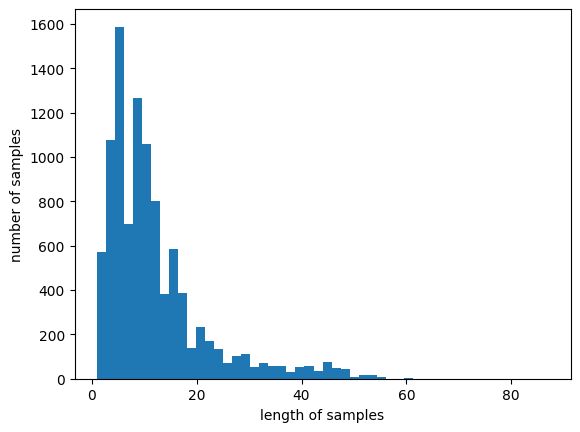

In [ ]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)


In [ ]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(2593, 100)

In [ ]:
print(model.wv.most_similar("최민식"))

[('국민', 0.9821428060531616), ('터', 0.9820960760116577), ('장', 0.9820606708526611), ('화려하다', 0.9818850755691528), ('일품', 0.9817587733268738), ('또한', 0.9817184805870056), ('~!', 0.981671154499054), ('음악', 0.9815290570259094), ('하고도', 0.9814808964729309), ('약간', 0.9814214706420898)]


In [ ]:
print(model.wv.most_similar("명작"))

[('임', 0.9984184503555298), ('제일', 0.9980313777923584), ('최고다', 0.9979985952377319), ('추천', 0.9979433417320251), ('대단하다', 0.9978734850883484), ('한국', 0.9978557825088501), ('대박', 0.9978455305099487), ('아이', 0.9978194236755371), ('몰입도', 0.9977919459342957), ('본', 0.9977680444717407)]


### 2) BPE Tokenizer 예시

- 가장 작은 단위에서부터 중복 빈도 순 단위를 합침
- 가장 큰 단어까지 합치고, 이전에 등장하지 않은 단어는 vocab에 있는 token으로 분절

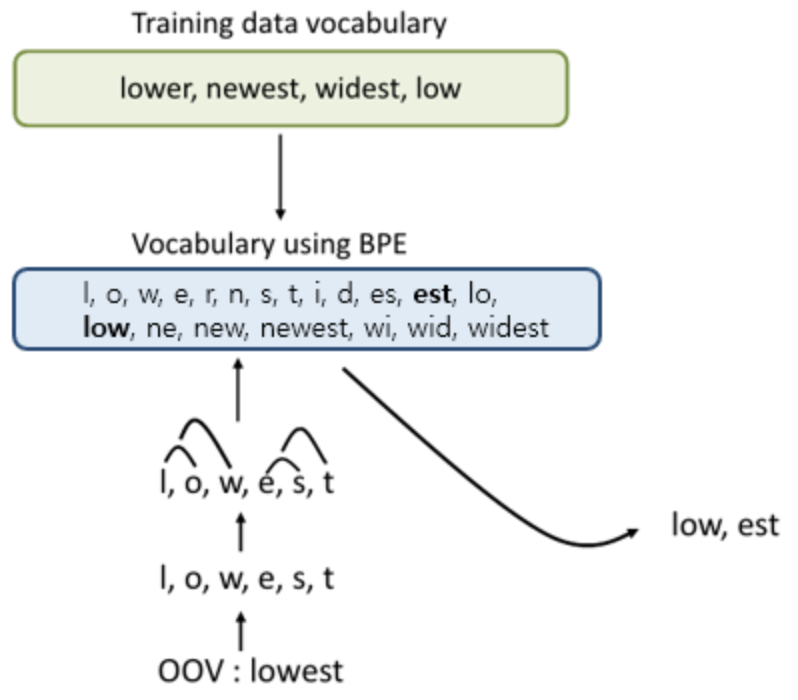

In [ ]:
num_merges = 10

In [ ]:
dictionary = {'l o w </w>' : 5,
              'l o w e r </w>' : 2,
              'n e w e s t </w>': 6,
              'w i d e s t </w>': 3
             }

In [ ]:
def get_stats(dictionary):
    # 유니그램의 pair들의 빈도수를 카운트
    pairs = collections.defaultdict(int)
    for word, freq in dictionary.items():
        symbols = word.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i],symbols[i+1]] += freq
    print('현재 pair들의 빈도수 :', dict(pairs))
    return pairs

In [ ]:
def merge_dictionary(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out

In [ ]:
bpe_codes = {}
bpe_codes_reverse = {}

for i in range(num_merges):
    display(Markdown("### Iteration {}".format(i + 1)))
    pairs = get_stats(dictionary)
    best = max(pairs, key=pairs.get)
    dictionary = merge_dictionary(best, dictionary)

    bpe_codes[best] = i
    bpe_codes_reverse[best[0] + best[1]] = best

    print("new merge: {}".format(best))
    print("dictionary: {}".format(dictionary))

### Iteration 1

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 8, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('e', 's'): 9, ('s', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'e'): 3}
new merge: ('e', 's')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w es t </w>': 6, 'w i d es t </w>': 3}


### Iteration 2

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'es'): 6, ('es', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'es'): 3}
new merge: ('es', 't')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est </w>': 6, 'w i d est </w>': 3}


### Iteration 3

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est'): 6, ('est', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est'): 3}
new merge: ('est', '</w>')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


### Iteration 4

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('l', 'o')
dictionary: {'lo w </w>': 5, 'lo w e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


### Iteration 5

현재 pair들의 빈도수 : {('lo', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('lo', 'w')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


### Iteration 6

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('n', 'e')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'ne w est</w>': 6, 'w i d est</w>': 3}


### Iteration 7

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('ne', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('ne', 'w')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'new est</w>': 6, 'w i d est</w>': 3}


### Iteration 8

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('new', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('new', 'est</w>')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'w i d est</w>': 3}


### Iteration 9

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('low', '</w>')
dictionary: {'low</w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'w i d est</w>': 3}


### Iteration 10

현재 pair들의 빈도수 : {('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('w', 'i')
dictionary: {'low</w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'wi d est</w>': 3}


In [ ]:
print(bpe_codes)

{('e', 's'): 0, ('es', 't'): 1, ('est', '</w>'): 2, ('l', 'o'): 3, ('lo', 'w'): 4, ('n', 'e'): 5, ('ne', 'w'): 6, ('new', 'est</w>'): 7, ('low', '</w>'): 8, ('w', 'i'): 9}


In [ ]:
def get_pairs(word):
    """Return set of symbol pairs in a word.
    Word is represented as a tuple of symbols (symbols being variable-length strings).
    """
    pairs = set()
    prev_char = word[0]
    for char in word[1:]:
        pairs.add((prev_char, char))
        prev_char = char
    return pairs


def encode(orig):
    """Encode word based on list of BPE merge operations, which are applied consecutively"""

    word = tuple(orig) + ('</w>',)
    display(Markdown("__word split into characters:__ <tt>{}</tt>".format(word)))

    pairs = get_pairs(word)

    if not pairs:
        return orig

    iteration = 0
    while True:
        iteration += 1
        display(Markdown("__Iteration {}:__".format(iteration)))

        print("bigrams in the word: {}".format(pairs))
        bigram = min(pairs, key = lambda pair: bpe_codes.get(pair, float('inf')))
        print("candidate for merging: {}".format(bigram))
        if bigram not in bpe_codes:
            display(Markdown("__Candidate not in BPE merges, algorithm stops.__"))
            break
        first, second = bigram
        new_word = []
        i = 0
        while i < len(word):
            try:
                j = word.index(first, i)
                new_word.extend(word[i:j])
                i = j
            except:
                new_word.extend(word[i:])
                break

            if word[i] == first and i < len(word)-1 and word[i+1] == second:
                new_word.append(first+second)
                i += 2
            else:
                new_word.append(word[i])
                i += 1
        new_word = tuple(new_word)
        word = new_word
        print("word after merging: {}".format(word))
        if len(word) == 1:
            break
        else:
            pairs = get_pairs(word)

    # 특별 토큰인 </w>는 출력하지 않는다.
    if word[-1] == '</w>':
        word = word[:-1]
    elif word[-1].endswith('</w>'):
        word = word[:-1] + (word[-1].replace('</w>',''),)

    return word

In [ ]:
encode("loki")

__word split into characters:__ <tt>('l', 'o', 'k', 'i', '</w>')</tt>

__Iteration 1:__

bigrams in the word: {('i', '</w>'), ('o', 'k'), ('l', 'o'), ('k', 'i')}
candidate for merging: ('l', 'o')
word after merging: ('lo', 'k', 'i', '</w>')


__Iteration 2:__

bigrams in the word: {('i', '</w>'), ('lo', 'k'), ('k', 'i')}
candidate for merging: ('i', '</w>')


__Candidate not in BPE merges, algorithm stops.__

('lo', 'k', 'i')

In [ ]:
encode("lowest")

__word split into characters:__ <tt>('l', 'o', 'w', 'e', 's', 't', '</w>')</tt>

__Iteration 1:__

bigrams in the word: {('s', 't'), ('l', 'o'), ('e', 's'), ('t', '</w>'), ('w', 'e'), ('o', 'w')}
candidate for merging: ('e', 's')
word after merging: ('l', 'o', 'w', 'es', 't', '</w>')


__Iteration 2:__

bigrams in the word: {('w', 'es'), ('l', 'o'), ('t', '</w>'), ('es', 't'), ('o', 'w')}
candidate for merging: ('es', 't')
word after merging: ('l', 'o', 'w', 'est', '</w>')


__Iteration 3:__

bigrams in the word: {('w', 'est'), ('est', '</w>'), ('o', 'w'), ('l', 'o')}
candidate for merging: ('est', '</w>')
word after merging: ('l', 'o', 'w', 'est</w>')


__Iteration 4:__

bigrams in the word: {('o', 'w'), ('w', 'est</w>'), ('l', 'o')}
candidate for merging: ('l', 'o')
word after merging: ('lo', 'w', 'est</w>')


__Iteration 5:__

bigrams in the word: {('lo', 'w'), ('w', 'est</w>')}
candidate for merging: ('lo', 'w')
word after merging: ('low', 'est</w>')


__Iteration 6:__

bigrams in the word: {('low', 'est</w>')}
candidate for merging: ('low', 'est</w>')


__Candidate not in BPE merges, algorithm stops.__

('low', 'est')

In [ ]:
encode("lowing")

__word split into characters:__ <tt>('l', 'o', 'w', 'i', 'n', 'g', '</w>')</tt>

__Iteration 1:__

bigrams in the word: {('i', 'n'), ('w', 'i'), ('n', 'g'), ('g', '</w>'), ('l', 'o'), ('o', 'w')}
candidate for merging: ('l', 'o')
word after merging: ('lo', 'w', 'i', 'n', 'g', '</w>')


__Iteration 2:__

bigrams in the word: {('i', 'n'), ('w', 'i'), ('lo', 'w'), ('n', 'g'), ('g', '</w>')}
candidate for merging: ('lo', 'w')
word after merging: ('low', 'i', 'n', 'g', '</w>')


__Iteration 3:__

bigrams in the word: {('i', 'n'), ('g', '</w>'), ('n', 'g'), ('low', 'i')}
candidate for merging: ('i', 'n')


__Candidate not in BPE merges, algorithm stops.__

('low', 'i', 'n', 'g')

In [ ]:
encode("highing")

__word split into characters:__ <tt>('h', 'i', 'g', 'h', 'i', 'n', 'g', '</w>')</tt>

__Iteration 1:__

bigrams in the word: {('i', 'g'), ('g', 'h'), ('i', 'n'), ('n', 'g'), ('g', '</w>'), ('h', 'i')}
candidate for merging: ('i', 'g')


__Candidate not in BPE merges, algorithm stops.__

('h', 'i', 'g', 'h', 'i', 'n', 'g')

### 3) Huggingface Tokenizer - BERT의 WordPiece Tokenizer

In [ ]:
import pandas as pd
import urllib.request
from transformers import AutoTokenizer, AutoModel, pipeline
from tokenizers import BertWordPieceTokenizer

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")


('ratings.txt', <http.client.HTTPMessage at 0x78fd9bbf9000>)

In [ ]:
naver_df = pd.read_table('ratings.txt')
naver_df = naver_df.dropna(how='any')

with open('naver_review.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(naver_df['document']))

In [ ]:
tokenizer = BertWordPieceTokenizer(lowercase=False)

In [ ]:
data_file = 'naver_review.txt'
vocab_size = 30000
limit_alphabet = 6000
min_frequency = 5

tokenizer.train(files=data_file,
                vocab_size=vocab_size,
                limit_alphabet=limit_alphabet,
                min_frequency=min_frequency)

In [ ]:
# vocab 저장
tokenizer.save_model('./')

['./vocab.txt']

In [ ]:
# vocab 로드
df = pd.read_fwf('vocab.txt', header=None)
df

,0
0,[PAD]
1,[UNK]
2,[CLS]
3,[SEP]
4,[MASK]
...,...
29995,말들이
29996,말라는
29997,말밖에는
29998,맘을


In [ ]:
encoded = tokenizer.encode('아 배고픈데 짜장면 먹고싶다.')
print('토큰화 결과 :',encoded.tokens)
print('정수 인코딩 :',encoded.ids)
print('디코딩 :',tokenizer.decode(encoded.ids))

토큰화 결과 : ['아', '배고', '##픈', '##데', '짜장면', '먹고', '##싶다', '.']
정수 인코딩 : [2111, 20630, 3965, 3303, 24681, 8688, 7379, 18]
디코딩 : 아 배고픈데 짜장면 먹고싶다.


In [ ]:
encoded = tokenizer.encode('커피 한잔의 여유를 즐기다')
print('토큰화 결과 :',encoded.tokens)
print('정수 인코딩 :',encoded.ids)
print('디코딩 :',tokenizer.decode(encoded.ids))

토큰화 결과 : ['커피', '한잔', '##의', '여유', '##를', '즐기', '##다']
정수 인코딩 : [12825, 25645, 3288, 12696, 3346, 10784, 3240]
디코딩 : 커피 한잔의 여유를 즐기다


In [ ]:
# 실제 embedding vector 확인 해보기
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

tokenizer.add_special_tokens({'pad_token':'[PAD]'})
tokenizer.add_special_tokens({'unk_token':'[UNK]'})

model.resize_token_embeddings(len(tokenizer))

pipe = pipeline('feature-extraction', model=model, tokenizer=tokenizer)

In [ ]:
data = pipe('This is a test')
print(len(data[0]))
print(len(data[0][0]))
print(data[0])

6
768
[[-0.026014449074864388, 0.19197262823581696, 0.03443865478038788, -0.07194504886865616, -0.11282810568809509, -0.2831309139728546, 0.09150350093841553, 0.12827178835868835, -0.004860712680965662, -0.14723284542560577, -0.02782871015369892, -0.06148500367999077, -0.05599752068519592, 0.18917089700698853, 0.1371898353099823, -0.14089320600032806, 0.022946596145629883, 0.19262821972370148, 0.09546227008104324, -0.20831413567066193, -0.10455271601676941, -0.09069589525461197, -0.18040074408054352, -0.2847973704338074, -0.013938501477241516, -0.12907247245311737, 0.037471625953912735, -0.15027274191379547, 0.05749122053384781, 0.13891828060150146, 0.16705584526062012, 0.009245113469660282, -0.0757925733923912, 0.17022353410720825, -0.03154502809047699, -0.05634450167417526, 0.08796167373657227, -0.03658274933695793, 0.07899647951126099, 0.0026788990944623947, -0.04536345601081848, 0.022180281579494476, 0.12595276534557343, 0.05710231885313988, -0.16020040214061737, -0.097464092075824